                                       DATA SCIENCE FINAL PROJECT    

In [1]:
#DataFrame and Numpy Package
import pandas as pd
import numpy as np
#Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
#Scaling and missing values replacing packages
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#Feature selection packages
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
#Model packages
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation Packages
from sklearn import tree,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc, classification_report

import os
working_directory = os.getcwd()
print(working_directory)

/Users/sam/Desktop/Data Science/Project


__Note:__
    **Run the model from start (Training Dataset) to run the visualization of the model implemented below for Training, Validation and Testing**

## Training Dataset

In [2]:
df = pd.read_csv("diabetic_data_train.csv")

In [3]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,93634,338369606,159605546,AfricanAmerican,Male,[70-80),?,1,23,7,...,No,No,No,No,No,No,No,No,No,NO
1,27698,90739116,83232054,Caucasian,Female,[70-80),[75-100),3,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,17488,64286964,95117913,Caucasian,Male,[60-70),?,3,1,1,...,No,No,No,No,No,No,No,Ch,Yes,>30
3,96510,376610012,136697972,AfricanAmerican,Male,[40-50),?,3,1,1,...,No,No,No,No,No,No,No,No,No,NO
4,35774,110557278,2851308,Caucasian,Male,[80-90),?,1,1,6,...,No,No,No,No,No,No,No,No,No,NO


In [4]:
'''All the initial checks of the data can be done by using the below methods from pandas'''
print(df.shape)
print(df.info())

(76324, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76324 entries, 0 to 76323
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76324 non-null  int64 
 1   encounter_id              76324 non-null  int64 
 2   patient_nbr               76324 non-null  int64 
 3   race                      76324 non-null  object
 4   gender                    76324 non-null  object
 5   age                       76324 non-null  object
 6   weight                    76324 non-null  object
 7   admission_type_id         76324 non-null  int64 
 8   discharge_disposition_id  76324 non-null  int64 
 9   admission_source_id       76324 non-null  int64 
 10  time_in_hospital          76324 non-null  int64 
 11  payer_code                76324 non-null  object
 12  medical_specialty         76324 non-null  object
 13  num_lab_procedures        76324 non-null  int64 
 14  num_proced

## Data Exploration

In [5]:
#A function to determine the percentage of the output class
def calc_prevalence(output_value):
    print("Prevalence for the given output class is",sum(output_value)/len(output_value))

In [6]:
"""The below condition will locate all the numbers in the discharge_discahrge disposition id and filter those from 
the main dataframe becasue the numbers 11,12,14,19,20,21 are not met the readmitted criteria and hence we are removing
the rows to avoid biasing"""
df = df.loc[~df.discharge_disposition_id.isin([11,12,14,19,20,21])]

#Converting the output column into binary calssification by making '<30' as '1' and other classes as '0'
df['target'] = (df.readmitted == '<30').astype('int')

#Dropping the readmitted column from the dataframe
df = df.drop('readmitted', axis = 'columns')

print("Shape of the dataframe", df.shape)

#From the output column, we can see that the classes are imbalanced
print("Checking the count of 1's and 0's in the target column \n", df.target.value_counts())

#Checking the percentage of the binary '1's present in the target column
calc_prevalence(df['target'])

'''Replacing all the question mark (missing values) with the NAN value in the data-frame'''
df=df.replace('?',np.nan)
print()
print(df.isnull().sum())

null_features = ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
print(df[null_features].info())

'''All the numeric features in the dataframe doesn't have null values and we need to only work on categorical features 
to replace the null values in the dataframe '''



Shape of the dataframe (74837, 51)
Checking the count of 1's and 0's in the target column 
 0    66338
1     8499
Name: target, dtype: int64
Prevalence for the given output class is 0.11356681855232037

Unnamed: 0                      0
encounter_id                    0
patient_nbr                     0
race                         1679
gender                          0
age                             0
weight                      72478
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  29497
medical_specialty           36695
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         20
diag_2                        275
diag_3                       1078
number_diagnoses                0
max_glu_serum  

"All the numeric features in the dataframe doesn't have null values and we need to only work on categorical features \nto replace the null values in the dataframe "

 ### Data Exploration Result:
 #### Around 11% of the output variable is only rehospitalized and all the remaining percentage of classes belongs to not re-hospitalized or admitted after more than 30 days
 ##### Issues found - Data Imbalance, Replace Null values, Some features needs to be dropped

## Feature Engineering:

In [7]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'weight', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'target'],
      dtype='object')

In [8]:
df.shape

(74837, 51)

In [9]:
#We are dropping the weights becasue it has 98% missing values and Unnamed: 0 has no relation to output Class
df = df.drop(['Unnamed: 0','weight'], axis='columns')#dropped

#Dropping all the duplicate rows of the patients who have encountered again after the first admission
df.drop_duplicates(subset ="patient_nbr", keep = 'first', inplace = True)#dropped

#We are dropping the encounter_id and patient_nbr which are of no use to the predictor variable (readmitted)
df=df.drop(['encounter_id','patient_nbr'], axis='columns')#dropped

#We are dropping the payer_code column as well, because it has no relation with the output column
df=df.drop(['payer_code'],axis=1)#dropped

'''The below print statement will give the unique value counts in each column of the dataframe'''
print(df.nunique(axis=0,dropna=False))

race                          6
gender                        3
age                          10
admission_type_id             8
discharge_disposition_id     21
admission_source_id          17
time_in_hospital             14
medical_specialty            70
num_lab_procedures          114
num_procedures                7
num_medications              74
number_outpatient            31
number_emergency             20
number_inpatient             18
diag_1                      674
diag_2                      694
diag_3                      717
number_diagnoses             16
max_glu_serum                 4
A1Cresult                     4
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose

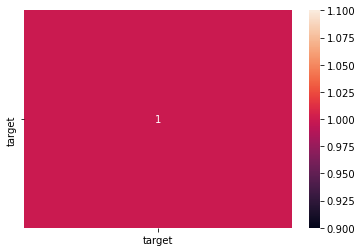

In [10]:
#Examining the attributes which has only one class in their column
single_count = ['examide','citoglipton','glimepiride-pioglitazone','target']
df[single_count]
sns.heatmap(df[single_count].corr(), annot=True)

#We are dropping the above columns becasue it has no relation between them and the output class
df=df.drop(['examide','citoglipton','glimepiride-pioglitazone'],axis='columns')#dropped

In [11]:
#Age is mapped to the lowest value for their respective range given in each rows
age_id = {'[0-10)': 0,
             '[10-20)': 10,
             '[20-30)': 20,
             '[30-40)': 30,
             '[40-50)': 40,
             '[50-60)': 50,
             '[60-70)': 60,
             '[70-80)': 70,
             '[80-90)': 80,
             '[90-100)': 90}

#Creating a new column called age_group and replacing it with mapped age_id variable
df['age_group'] = df.age.replace(age_id)

df=df.drop(['age'],axis='columns')

In [12]:
#NAN columns in the dataframe
df.columns[df.isnull().any()]

Index(['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], dtype='object')

In [13]:
#Selecting all the columns which has NAN values
Feature_selection = ['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

In [14]:
#Applying Label_encoder for all the NAN columns by keeping the NAN values
df_NAN_Columns= df[Feature_selection].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

In [15]:
#Dropping all the columns from the original dataframe which was stored previosuly in another variable
df = df.drop(['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], axis =1)

In [16]:
#Storing all the categorical columns in the dataframe in a variable called categorical_columns
categorical_columns = ['gender','admission_type_id','discharge_disposition_id','admission_source_id'
    ,'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide'
   ,'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone'
   ,'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin'
   ,'glyburide-metformin','glipizide-metformin','metformin-rosiglitazone'
   ,'metformin-pioglitazone','change','diabetesMed']

In [17]:
#Applying one_hot_encoding to all the categorical columns and making drop_first has true
one_hot_encoding = pd.get_dummies(df[categorical_columns], drop_first = True)

In [18]:
#Joining all the columns(one_hot_encoded datframe and NAN_column dataframe) back to the original dataframne.
df=pd.concat([df ,one_hot_encoding, df_NAN_Columns], axis = 1)

In [19]:
#Dropping all the original columns from the dataframe which was one_hot_encoded
df=df.drop(['gender','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide'
   ,'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone'
   ,'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin'
   ,'glyburide-metformin','glipizide-metformin','metformin-rosiglitazone'
   ,'metformin-pioglitazone','change','diabetesMed'],axis = 1)

In [20]:
#Checking columns which has NAN values
df.columns[df.isnull().any()]

Index(['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], dtype='object')

In [21]:
#Applying MINMAX Scaler to the dataframe
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [22]:
#Using KNNImputer to replace all the NAN values present in the dataframe
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [23]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [24]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,target,age_group,...,glipizide-metformin_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,race,medical_specialty,diag_1,diag_2,diag_3
0,0.153846,0.516667,0.000000,0.0750,0.0,0.0,0.0,0.466667,0.0,0.777778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.223529,0.333333,0.200867,0.374825
1,0.000000,0.441667,1.000000,0.0875,0.0,0.0,0.0,0.333333,0.0,0.777778,...,0.0,0.0,0.0,1.0,0.0,0.5,0.044118,0.372024,0.332370,0.857343
2,0.230769,0.416667,0.166667,0.2250,0.0,0.0,0.0,0.200000,0.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.5,0.535294,0.492560,0.101156,0.476923
3,0.076923,0.125000,0.000000,0.0750,0.0,0.0,0.0,0.266667,0.0,0.444444,...,0.0,0.0,0.0,1.0,0.0,0.0,0.252941,0.540179,0.654624,0.317483
4,0.000000,0.525000,0.000000,0.0250,0.0,0.0,0.0,0.266667,0.0,0.888889,...,0.0,0.0,0.0,1.0,0.0,0.5,0.161765,0.770833,0.101156,0.317483


## Feature Selection and Evaluation:

In [25]:
#Shuffling the data again by using .sample() method to split the data for training and validation
df_data =df.sample(n=len(df),random_state=42)

#Splitting 
df_valid_test = df_data.sample(frac = 0.02, random_state = 42)
print("Split size: %.3f"%((len(df_valid_test))/len(df_data)))

Split size: 0.020


In [26]:
df_train_all = df.drop(df_valid_test.index)

In [27]:
calc_prevalence(df_train_all['target'])
calc_prevalence(df_valid_test['target'])

Prevalence for the given output class is 0.07999491057147012
Prevalence for the given output class is 0.07836153161175423


In [28]:

#print(df_shuffled.shape)
positive_rows = df_train_all.target == 1

'''Splitting the data into positive and negative'''
train_pos_rows = df_train_all.loc[positive_rows]# binary value '1' are splitted and stored
train_neg_rows = df_train_all.loc[~positive_rows]# binary value '0' are splitted and stored

#Making it a balanced data by appling under sampling technique here
data_merged = pd.concat([train_pos_rows,train_neg_rows.sample(n= len(train_pos_rows),random_state = 42)], axis =0)
data_merged.shape

(8802, 68)

In [29]:
#We are shuffling the data again after merging the data back together
df_data = data_merged.sample(n=len(data_merged),random_state=42)
#Converting the target column back to int type after minmax scaling
df_data['target'] = df_data['target'].astype("int")
#df_data.head()

In [30]:
#Storing the input columns in the X variable
X = df_data.drop('target', axis = 1)
#Storing the output column in the y variable
y = df_data['target']

['feature_idx', 'cv_scores', 'avg_score', 'feature_names']


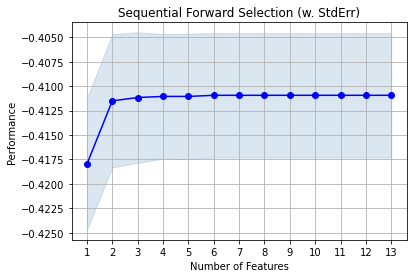

In [31]:
#Sequential_Forward_selector is used for selcting the appropriate features
sfs = SFS(DecisionTreeClassifier(), 
          k_features=13, 
          forward=True, 
          floating=False,
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
print(list(df_SFS_results))
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [32]:
#print(list(df_SFS_results.iloc[:,-1]))

In [33]:
"""The below feature is selected after performing linear sequential_feature_selector for multiple times using 
different models and the below features are selected atlast after rigorous selection"""
Selected_Feature = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'age_group', 'diag_1', 'max_glu_serum_Norm', 'A1Cresult_None', 'metformin_Up', 'race', 'tolazamide_Steady', 'insulin_Steady', 'glipizide-metformin_Steady', 'diabetesMed_Yes']


## Modeling:

In [34]:
#Storing the under_sampled data in the X_train variable
X_train = df_data[Selected_Feature].values
#Storing the complete data in X_train_all
X_train_all = df_train_all[Selected_Feature].values
#Storing the validation data in X_valid
X_valid = df_valid_test[Selected_Feature].values

#y_train as the target column of under sampled data
y_train = df_data['target'].values
#y_valid as the target column of splitted data
y_valid = df_valid_test['target'].values

print("Training all shapes:",X_train_all.shape)
print("Training shapes:",X_train.shape, y_train.shape)
print("Validation shapes:",X_valid.shape, y_valid.shape)

Training all shapes: (55016, 17)
Training shapes: (8802, 17) (8802,)
Validation shapes: (1123, 17) (1123,)


In [35]:
def calc_specificity(y_actual, y_pred, thresh):
    #calculates specificity
    return sum((y_pred<thresh) & (y_actual == 0)) / sum(y_actual == 0)

In [36]:
#Calculating the remaining AUC_Score, Accuracy, Recall_score(Sensitivity), Precision and specificity
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual,(y_pred > thresh))
    Recall_score = recall_score(y_actual,(y_pred > thresh))
    Precision = precision_score(y_actual,(y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print("AUC SCORE:%.3f"%auc)
    print("accuracy:%.3f "%accuracy)
    print("Recall_score:%.3f "%Recall_score)
    print("precision:%.3f "%Precision)
    print("specificity:%.3f "%specificity)
    print(' ')
    
    return auc, accuracy, Recall_score, Precision, specificity

In [37]:
#Initializing a thresh value of 0.5
thresh = 0.5

In [38]:
#PERFORMING KNN MODEL
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_train_preds1 = knn.predict_proba(X_train)[:,-1]
y_valid_preds1 = knn.predict_proba(X_valid)[:,-1]

print('KNN')

print("Training: ")
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train, y_train_preds1, thresh)

print("Validation: ")
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid, y_valid_preds1, thresh)

KNN
Training: 
AUC SCORE:0.644
accuracy:0.605 
Recall_score:0.563 
precision:0.615 
specificity:0.578 
 
Validation: 
AUC SCORE:0.566
accuracy:0.587 
Recall_score:0.477 
precision:0.091 
specificity:0.525 
 


In [39]:
#PERFORMING LOGISTIC REGRESSION MODEL
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_train_preds2 = lr.predict_proba(X_train)[:,-1]
y_valid_preds2 = lr.predict_proba(X_valid)[:,-1]

print('Logistic Regression')

print("Training: ")
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train, y_train_preds2, thresh)

print("Validation: ")
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid, y_valid_preds2, thresh)

Logistic Regression
Training: 
AUC SCORE:0.642
accuracy:0.603 
Recall_score:0.566 
precision:0.611 
specificity:0.640 
 
Validation: 
AUC SCORE:0.634
accuracy:0.631 
Recall_score:0.534 
precision:0.112 
specificity:0.640 
 


In [40]:
#PERFORMING DECISION TREE MODEL
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train,y_train)

y_train_preds3 = tree.predict_proba(X_train)[:,-1]
y_valid_preds3 = tree.predict_proba(X_valid)[:,-1]

print('Decision Tree')

print("Training: ")
dt_train_auc, dt_train_accuracy, dt_train_recall, \
    dt_train_precision, dt_train_specificity = print_report(y_train, y_train_preds3, thresh)

print("Validation: ")
dt_valid_auc, dt_valid_accuracy, dt_valid_recall, \
    dt_valid_precision, dt_valid_specificity = print_report(y_valid, y_valid_preds3, thresh)

Decision Tree
Training: 
AUC SCORE:0.768
accuracy:0.687 
Recall_score:0.694 
precision:0.684 
specificity:0.661 
 
Validation: 
AUC SCORE:0.613
accuracy:0.581 
Recall_score:0.625 
precision:0.112 
specificity:0.562 
 


In [41]:
#PERFORMING RANDOM FOREST MODEL
rf = RandomForestClassifier(max_depth=6,random_state=42)
rf.fit(X_train,y_train)

y_train_preds4 = rf.predict_proba(X_train)[:,-1]
y_valid_preds4 = rf.predict_proba(X_valid)[:,-1]

print('Random FOrest')

print("Training: ")
rf_train_auc, rf_train_accuracy, rf_train_recall, \
    rf_train_precision, rf_train_specificity = print_report(y_train, y_train_preds4, thresh)

print("Validation: ")
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, \
    rf_valid_precision, rf_valid_specificity = print_report(y_valid, y_valid_preds4, thresh)

Random FOrest
Training: 
AUC SCORE:0.692
accuracy:0.636 
Recall_score:0.616 
precision:0.641 
specificity:0.656 
 
Validation: 
AUC SCORE:0.648
accuracy:0.622 
Recall_score:0.591 
precision:0.118 
specificity:0.625 
 


## Test-Dataset:

#### The steps below implemented are Preprocessing, Feature_selection, Feature_evaluation and Modeling, which are copied and pasted from training dataset after testing the preprocessing steps completely on training dataset.

__Note:__
    **Run the model from start(Training Dataset) to test the visualization of the model implemented below for Training, Validation and Testing**

In [42]:
df = pd.read_csv("diabetic_data_test.csv")

In [43]:
'''Performing all the necessary preprocessing and feature selection techniques performed under training'''
"""SAMPLING IS NOT PERFORMED FOR THE TESTING DATASET"""

df = df.loc[~df.discharge_disposition_id.isin([11,12,14,19,20,21])]

df['target'] = (df.readmitted == '<30').astype('int')

df = df.drop('readmitted', axis = 'columns')

df.drop_duplicates(subset ="patient_nbr", keep = 'first', inplace = True)

df=df.replace('?',np.nan)

df = df.drop(['Unnamed: 0','weight'], axis='columns')

df=df.drop(['encounter_id','patient_nbr'], axis='columns')

df=df.drop(['examide','citoglipton','glimepiride-pioglitazone'],axis='columns')

df=df.drop(['payer_code'],axis=1)

age_id ={'[0-10)': 0,
             '[10-20)': 10,
             '[20-30)': 20,
             '[30-40)': 30,
             '[40-50)': 40,
             '[50-60)': 50,
             '[60-70)': 60,
             '[70-80)': 70,
             '[80-90)': 80,
             '[90-100)': 90}
df['age_group'] = df.age.replace(age_id)

df=df.drop(['age'],axis='columns')

Feature_selection = ['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

df_NAN_Columns= df[Feature_selection].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index))

df=df.drop(['race', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], axis = 'columns')

df = pd.concat([df,df_NAN_Columns], axis = 1)

categorical_columns = ['gender','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide'
   ,'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone'
   ,'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin'
   ,'glyburide-metformin','glipizide-metformin','metformin-rosiglitazone'
   ,'metformin-pioglitazone','change','diabetesMed']

one_hot_encoding = pd.get_dummies(df[categorical_columns], drop_first = True)

df=pd.concat([df,one_hot_encoding], axis = 1)

df=df.drop(['gender','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide'
   ,'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone'
   ,'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin'
   ,'glyburide-metformin','glipizide-metformin','metformin-rosiglitazone'
   ,'metformin-pioglitazone','change','diabetesMed'],axis = 1)

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
imputer = KNNImputer(n_neighbors=10)

df_data = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

df_data = df_data.sample(n=len(data_merged),random_state=42)

df_data['target'] = df_data['target'].astype("int")

X_test = df_data[Selected_Feature].values
y_test = df_data['target'].values


In [44]:
#KNearestNeighbour Model
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_test, y_test)

y_test_pred1 = knn.predict_proba(X_test)[:,-1]
knn_probs = knn.predict_proba(X_test)
print('KNN\n')

print("Testing: ")
knn_test_auc, knn_test_accuracy, knn_test_recall, \
    knn_test_precision, knn_test_specificity = print_report(y_test, y_test_pred1, thresh)

KNN

Testing: 
AUC SCORE:0.677
accuracy:0.902 
Recall_score:0.000 
precision:0.000 
specificity:1.000 
 


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
#Logistic_Regression
lr = LogisticRegression()
lr.fit(X_test,y_test)

y_test_pred2 = lr.predict_proba(X_test)[:,-1]

print('Logistic Regression\n')

print("Testing: ")
lr_test_auc, lr_test_accuracy, lr_test_recall, \
    lr_test_precision, lr_test_specificity = print_report(y_test, y_test_pred2, thresh)

Logistic Regression

Testing: 
AUC SCORE:0.637
accuracy:0.902 
Recall_score:0.008 
precision:0.636 
specificity:0.999 
 


In [46]:
#DecisionTreeClassifier Model
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_test,y_test)

y_test_pred3 = tree.predict_proba(X_test)[:,-1]

print('Decision Tree\n')

print("Testing: ")
dt_test_auc, dt_test_accuracy, dt_test_recall, \
    dt_test_precision, dt_test_specificity = print_report(y_test, y_test_pred3, thresh)


Decision Tree

Testing: 
AUC SCORE:0.768
accuracy:0.915 
Recall_score:0.148 
precision:0.908 
specificity:0.998 
 


In [47]:
#Random_Forest_Model
rf.fit(X_test,y_test)

y_test_pred4 = rf.predict_proba(X_test)[:,-1]
rf_probs = rf.predict_proba(X_test)
print('Random Forest\n')

print("Training: ")
rf_test_auc, rf_test_accuracy, rf_test_recall, \
    rf_test_precision, rf_test_specificity = print_report(y_test, y_test_pred4, thresh)

Random Forest

Training: 
AUC SCORE:0.727
accuracy:0.903 
Recall_score:0.012 
precision:1.000 
specificity:1.000 
 


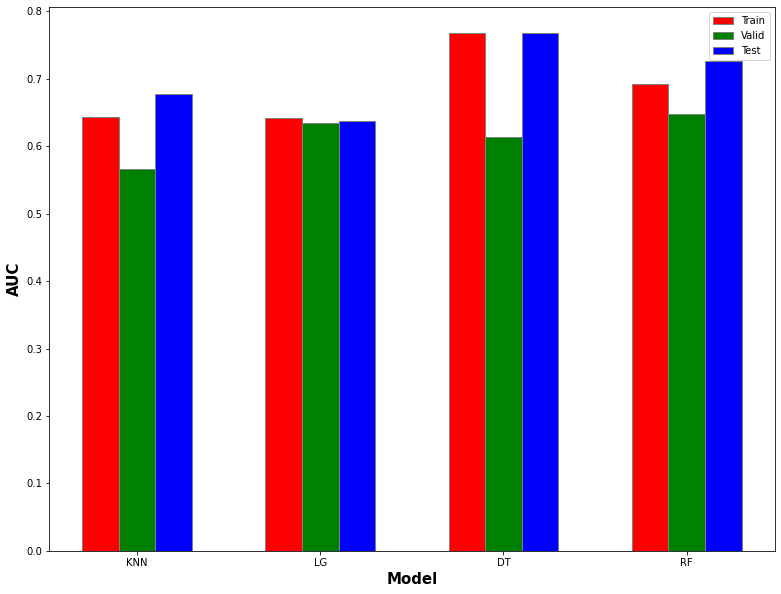

In [48]:
# BAR CHART FOR THE TRAIN, VALIDATION AND TEST MODELS for AUC SCORE
#Set the barwidth and the size of the whole plot
barWidth = 0.20
fig = plt.subplots(figsize =(13, 10))

Train = [knn_train_auc, lr_train_auc, dt_train_auc, rf_train_auc]
Valid = [knn_valid_auc, lr_valid_auc, dt_valid_auc, rf_valid_auc]
Test =  [knn_test_auc, lr_test_auc, dt_test_auc, rf_test_auc]
 
# Set position of bar on X axis
br1 = np.arange(len(Train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Train, color ='r', width = barWidth,
        edgecolor ='grey', label ='Train')
plt.bar(br2, Valid, color ='g', width = barWidth,
        edgecolor ='grey', label ='Valid')
plt.bar(br3, Test, color ='b', width = barWidth,
        edgecolor ='grey', label ='Test')
 
# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('AUC', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Train))],
        ['KNN', 'LG', 'DT', 'RF'])
 
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.677
Logistic: ROC AUC=0.637
Decision_Tree: ROC AUC=0.768
Random_Forest: ROC AUC=0.727


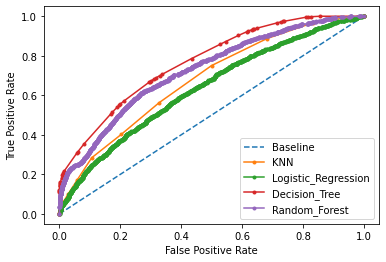

In [49]:
# ROC CURVES FOR THE TEST MODELS
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, y_test_pred1)
lr_auc = roc_auc_score(y_test, y_test_pred2)
tree_auc = roc_auc_score(y_test, y_test_pred3)
rf_auc = roc_auc_score(y_test, y_test_pred4)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Decision_Tree: ROC AUC=%.3f' % (tree_auc))
print('Random_Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_test_pred1)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_test_pred2)
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_test_pred3)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_test_pred4)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic_Regression')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision_Tree')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random_Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

KNN: f1=0.000 Precision_Recall_auc=0.193
Logistic_Regression: f1=0.016 Precision_Recall_auc=0.171
Decision_Tree: f1=0.254 Precision_Recall_auc=0.389
Random_forest: f1=0.023 Precision_Recall_auc=0.310


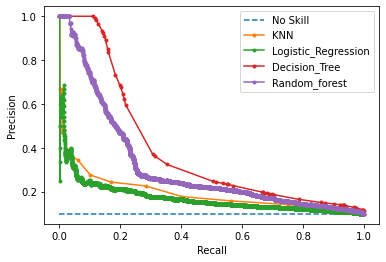

In [50]:
knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
yhat = knn.predict(X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, yhat), auc(knn_recall, knn_precision)

lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
yhat = lr.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

dt_probs = tree.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
yhat = tree.predict(X_test)
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
dt_f1, dt_auc = f1_score(y_test, yhat), auc(dt_recall, dt_precision)

rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
yhat = rf.predict(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)

print('KNN: f1=%.3f Precision_Recall_auc=%.3f' % (knn_f1, knn_auc))
print('Logistic_Regression: f1=%.3f Precision_Recall_auc=%.3f' % (lr_f1, lr_auc))
print('Decision_Tree: f1=%.3f Precision_Recall_auc=%.3f' % (dt_f1, dt_auc))
print('Random_forest: f1=%.3f Precision_Recall_auc=%.3f' % (rf_f1, rf_auc))

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic_Regression')
plt.plot(dt_recall, dt_precision, marker='.', label='Decision_Tree')
plt.plot(rf_recall, rf_precision, marker='.', label='Random_forest')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Results and Improvements:

1. __"Recall_Score"Models recall value is very less, which shows the model has high false negative values present, it means the model will predict the patients who has admitted less than 30 days as the patients not admitted less than 30 days__
2. __'Number_inpatient' column is highly related to the output column compared to other columns present, which shows that the patients who had visited last year to the hospital has high linearity towards readmitted again__
3. __'diag_1' columns is also highly related with the output columns compared with other columns present, which show diagnosis of patients primarily will lead to hospital re-asmission, but we don't know what type of diagnosis exactly because we need to visualize which diagnosia will have high probability in hospital readmission__
4. __"Grid_Search_CV", grid_search can be applied for every model to select the best hyperparameters and this would incease the model recall score__
5. __"Decision_Tree", Out of all the models implemented decision tree is the best model of all the models interms of recall score and also F1-score(Precision_Recall_Score)__
6. __"Deep Learning", Deep Learning can be implemented to evaluate the dataframe and some of the deep learning models have the capability to capture the features__
7. __"Feature_selection", Even more care should be given for feature selection to produce a good model__


### References:

1. TowardsDataScience
2. MachineLearningMastery
3. ResearchArticles
4. GeeksforGeeks
5. Pandas,ScikitLearn, Matplotlib and other librarires docs